# Data vizualization training
Mika Sahlberg
12.01.2021

#Trends - A trend is defined as a pattern of change.
    
    sns.lineplot - Line charts are best to show trends over a period of time, 
    and multiple lines can be used to show trends in more than one group.

#Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
    
    sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups
    
    sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
    
    sns.scatterplot - Scatter plots show the relationship between two continuous variables; 
    if color-coded, we can also show the relationship with a third categorical variable.
    
    sns.regplot - Including a regression line in the scatter plot makes 
    it easier to see any linear relationship between two variables.
    
    sns.lmplot - This command is useful for drawing multiple regression lines, 
    if the scatter plot contains multiple, color-coded groups.
    
    sns.swarmplot - Categorical scatter plots show the relationship between 
    a continuous variable and a categorical variable.

#Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
    
    sns.distplot - Histograms show the distribution of a single numerical variable.
    
    sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, 
    smooth distribution of a single numerical variable (or two numerical variables).
    
    sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot 
    with the corresponding KDE plots for each individual variable.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import numpy as np
print("setup complete")

setup complete


In [2]:
# Path of the file to read
filepath = "data/data.xlsx"

# Read the file into a variable fifa_data
data=pd.read_excel(
     filepath,
     engine='openpyxl',
)

In [3]:
#Format data
data["pv"] = pd.to_datetime(data['pv']).dt.date
data["uni"] = pd.to_datetime(data['uni'], format='%H:%M:%S')

# Print the first 5 rows of the data and data types
data.head()
data.dtypes


Vko                         float64
pv                           object
rasva                       float64
paino                       float64
kulutetut kalorit           float64
treeni (Y/N)                 object
askeleet                    float64
uni                  datetime64[ns]
dtype: object

Text(0, 0.5, 'Paino')

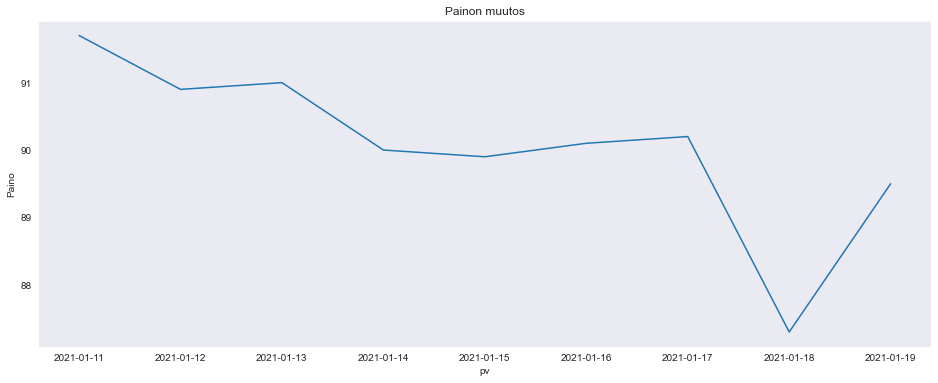

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Change the style of the figure to the "dark" theme
# different styles: "darkgrid", "whitegrid", "dark", "white", "ticks"
sns.set_style("dark")

# Line chart 
plt.title("Painon muutos")
sns.lineplot(y=data["paino"], x=data["pv"])
plt.ylabel("Paino")

In [5]:
#sns.lmplot(x=data["paino"], y=data["pv"], data=data, lowess=True)

Text(0.5, 16.0, 'Date')

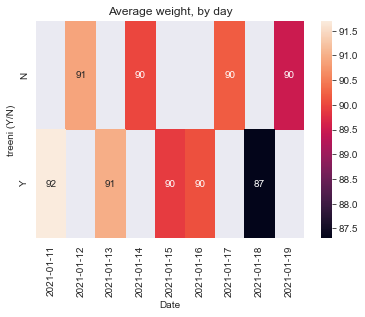

In [6]:
# Heat map
# Pivot table
heatmap_data = pd.pivot_table(data, values="paino", index=["treeni (Y/N)"], columns="pv")

# Add title
plt.title("Average weight, by day")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(heatmap_data, annot=True)

#Add label for horizontal axis
plt.xlabel("Date")

<AxesSubplot:xlabel='askeleet', ylabel='kulutetut kalorit'>

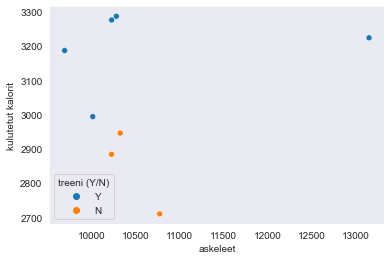

In [7]:
#Scatter plot
sns.scatterplot(x=data['askeleet'], y=data['kulutetut kalorit'], hue=data['treeni (Y/N)'])

<AxesSubplot:xlabel='paino', ylabel='Count'>

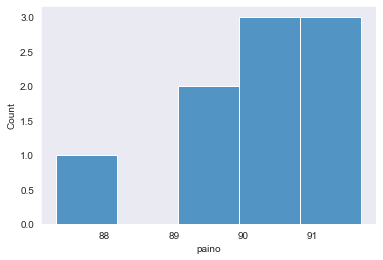

In [8]:
#Histogram
sns.histplot(data["paino"], kde=False)

In [9]:
#Scatter plot
#sns.regplot(x=data['uni'], y=data['askeleet'],  data=data)

Text(0, 0.5, 'Uni')

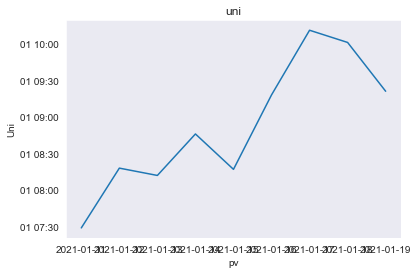

In [10]:
# Line chart 
plt.title("uni")
sns.lineplot(y=data["uni"], x=data["pv"])
plt.ylabel("Uni")

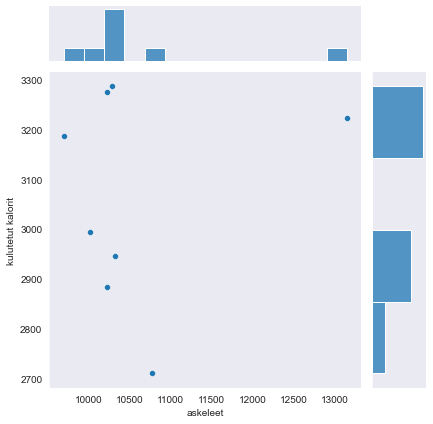

In [11]:
# 2D KDE plot
sns.jointplot(x=data['askeleet'], y=data['kulutetut kalorit'])

In [12]:
# Histograms for each species
#sns.distplot(a=data1['Length (cm)'], label="make", kde=False)
#sns.distplot(a=data2['Length (cm)'], label="pekka", kde=False)
#sns.distplot(a=data3['Length (cm)'], label="ransu", kde=False)

# Add title
#plt.title("maken,pekan ja ransun pituudet")

# Force legend to appear
#plt.legend()